# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

## <span style="color:darkred">Módulo I - Dados Estruturados e Não Estruturados</span>

**Material Produzido por Moacir Antonelli Ponti**

**Cemeai - ICMC/USP São Carlos**


---
__Conteúdo:__
1. *Dados Não-estruturados* e *Estruturados*
2. Problemas típicos em bases de dados: informações faltantes
3. Pontos "fora da curva" (*outliers*)

__Referências:__
- Salvador García, Julián Luengo, Francisco Herrera. Data Processing in Data Mining, 2015.
- Hadley Wickham, Tidy Data. Journal of Statistical Software, v.59, n.10, 2014.

***

## 1. Dados não estruturados

Símbolos organizados em documentos de vários formatos.

Seu propósito é serem lidos e analisados por humanos dentro de um contexto cultural.

Como humanos temos capacidades de compreender dados não estruturados pois podemos:

- interpretar mistura de símbolos e elementos 
![documento](documento.jpg)


- detectar e corrigir erros

### "Ess3 texto foi escritto para mstrar como somvs capzes de corigir err0s"


- preencher informacoes faltantes

![preencher](fillgaps.jpg)


- lidar com ambiguidade
![ambiguidade](ambiguidade.png)




- reconhecer e compreender humor e sentimentos por meio de elementos complexos
![twit](mafalda.jpg)

Por isso são de **difícil análise automática/computacional**
 

#### Exemplo - comparando imagens

Imagens são exemplos de objetos não estruturados, pois seu conteúdo é projetado para interpretacão humana.

Vamos carregar duas imagens relacionadas a uma palavra chave: "cebolinha"

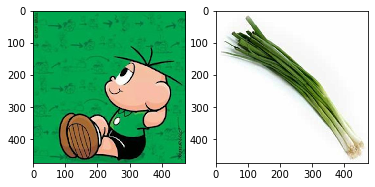

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# carregar e exibir imagens da "base de dados"
img1 = imageio.imread("cebolinha2.jpg")
img2 = imageio.imread("cebolinha3.jpg")

plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)


Nesse exemplo, vamos considerar que essas são as imagens de *referência* sobre o conceito **cebolinha** e agora vamos obter uma nova imagem, de consulta, a qual queremos comparar com as duas imagens de referência.

Vamos computar a distância entre a imagem de consulta, e ambas imagens referência, e considerar mais similar aquela com a menor distância. Imagens estão em formato binário, e podem ser vistas como sequências de bytes.

Há várias formas de calcular a distância. Seja um par de objetos a serem comparados: $A$ e $B$, cada um contendo elementos $i=1 \cdots N$, então a distância Euclidiana é:

$$ d(A,B) = \sqrt{ \sum_{i}^N (A_i - B_i)^2 } $$


In [7]:
# carregar imagem de consulta e codificar funcao de distancia
# computar as distancias e exibir
imgQ = imageio.imread("imagens/cebolinha1.jpg")

def img_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

dQ1 = img_distance(imgQ, img1)
dQ2 = img_distance(imgQ, img2)

print("Imagem da esquerda:", dQ1)
print("Imagem da direita:",dQ2)


Imagem da esquerda: 7850.7686884788545
Imagem da direita: 5827.087265521257


Notamos que, pela distância Euclidiana, a imagem da direita é a mais similar! Vamos revelar a imagem de consulta:

674028


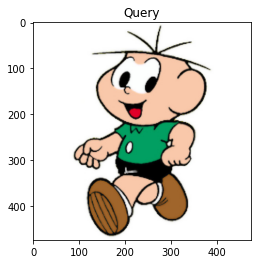

In [8]:
# mostrar imagem de consulta
plt.imshow(imgQ)
plt.title('Query')

print(np.product(imgQ.shape))

O mesmo pode ocorrer com documentos em geral, textos, etc.

Isso mostra que trabalhar com dados não estruturados pode ser não trivial!

Exemplos de documentos não estruturados:
* emails, 
* artigos,
* documentos em PDF,
* comentários e postagens em redes sociais,
* interacão entre consumidores,
* áudio,
* dados adquiridos por sensores

Características de dados não estruturados:
* **binários** e/ou **caracteres**
* **alta flexibilidade** (não possuem esquema)
* **coleta** feita com baixo **controle** (*in the wild*)
* **não verificados** / **não certificados**
* possuem alta **redundância**
* possuem alta **dimensionalidade**







## 2. Dados estruturados

Dados cujos elementos são *endereçáveis*, facilitando armazenamento e recuperação, organizados em um repositório formatado.

Em contrapartida aos dados não-estruturados nos quais não há um esquema que mostre o atributo ou a informação que eu desejaria recuperar mas que não é disponível de forma direta.

Dados estruturados estão prontos para ser armazenados em **bases de dados relacionais**, por exemplo:

 username     | Primeiro Nome  | Sobrenome | Ano de nascimento
 :------ |:--------- |:----- | --- | 
 joao@provider.com     | João | Oliveira | 1996
 bet89@hoster.net    | Elizabete | Costa Silva | 1989
 maria@internet.com.br | Maria Cláudia | Nunes de Souza | 1976
 
 transpondo informações das imagens que mostramos no caso não estruturado:

 ID     | Conceito  | Categoria
 ------ |:---------:| -----:|
 01     | Cebolinha | Personagem
 02     | Cebolinha | Personagem
 03     | Cebolinha | Alimento
 
 Mas note que as informações estruturadas não são suficientes para dar uma idéia completa da imagem a que nos referimos! Em particular, os IDs 01 e 02 tem exatamente os mesmos dados estruturados.
 
 
 #### Terminologia de bases relacionais
 
 * **Campo, atributo ou variável**: um elemento específico para o qual temos dados, por exemplo: username na primeira tabela mostrada, relativo a *coluna* da tabela
 * **Tupla ou registro**: um conjunto de valores de atributos, por exemplo: (joao@provider.com, João, Oliveira, 1996), relativo à *linha* da tabela
 * **Tabela ou relação**: conjunto de linhas e colunas compartilhando os mesmos atributos, organizando a mesma informação acerca de um tipo de objeto
 
 Em dados estruturados podemos ainda definir relações com outros dados.
 
 Por exemplo, definimos duas tabelas, a primeira para a imagem, e a segunda para conceitos.

*Tabela 1 - Conceitos*
 
 ID_c     | Descricão |
 ------ |:---------:|
 1     | Cebolinha |
 2     | Coentro |
 

*Tabela 2 - Imagens*
 
 
 ID_i   | Conceito (Conceitos->ID_c)  | Categoria
 ---- |:---:| -----:|
 01   |  1  | Personagem
 02   |  1  | Personagem
 03   |  1  | Alimento
 04   |  2  | Alimento
 
 
 Aqui, temos esquema, e podemos definir que, por exemplo:
 - ID_c, ID_i e Conceito são sempre números inteiros
 - ID_c não pode se repetir em tuplas distintas na tabela
 - ID_i não pode se repetir em tuplas distintas na tabela
 - Conceito pode conter apenas valores que existam em ID_c na tabela Conceitos

A possibilidade de realizar validação e controle de entrada torna esses dados mais confiáveis.

Finalmente, é possível projetar **buscas** para recuperar informação de forma eficiente!

In [9]:
conceitos = { 'ID_c' : [1, 2],
              'Descricao': ['Cebolinha', 'Coentro']}


imagens = {'ID_i':      [1,2,3,4],
           'Conceito' : [1,1,1,2],
           'Categoria': ['Personagem',
                         'Personagem',
                         'Alimento',
                         'Alimento']
          }

import pandas as pd
df_conc = pd.DataFrame(conceitos)
df_imag = pd.DataFrame(imagens)

print(df_conc)
print()
print(df_imag)



   ID_c  Descricao
0     1  Cebolinha
1     2    Coentro

   ID_i  Conceito   Categoria
0     1         1  Personagem
1     2         1  Personagem
2     3         1    Alimento
3     4         2    Alimento


In [10]:
df_imag[ df_imag['Categoria']=='Alimento' ]

,ID_i,Conceito,Categoria
2,3,1,Alimento
3,4,2,Alimento


In [11]:
c = df_conc[ df_conc['Descricao'] == 'Cebolinha']

# use com cuidado, só funciona se a consulta anterior retornar alguma linha
df_imag[df_imag['Conceito'] == c.iloc[0]['ID_c']]

,ID_i,Conceito,Categoria
0,1,1,Personagem
1,2,1,Personagem
2,3,1,Alimento


## 3. Resumo e considerações finais

Dados não estruturados:
* representam grande parte dos dados disponíveis, tanto em sistemas privados quanto publicamente
* continua a crescer devido a
    - menor custo e facilidade de aquisição
    - dispositivos móveis conectados

Dados estruturados:
* robustos
* fáceis de versionar
* mais confiáveis
* maior custo de manutenção

**Muitos esforços são direcionados a obter dados estruturados a partir de dados não estruturados!**

Nesse processo uma série de escolhas precisam ser feitas para ter sucesso no resultado desejado.
